# `Scikit-learn`, introduction à l'apprentissage supervisé et non supervisé.

`Scikit-learn` est une biliothèque `Python` largement utilisée pour le machine learning, offrant un large éventail d'outils pour le traitement, l'analyse et la modélisation des données. Parmi ses nombreuses fonctionnalités, les algorithmes d'apprentissage supervisé et non supervisé sont fondamentaux pour la construction de modèles prédictifs.

## 1. Apprentissage supervisé.

L'apprentissage supervisé est une méthode où le modèle est formé sur un ensemble de données étiquetées. Cela signifie que pour chaque exemple d'entrée, il existe une sortie correspondantes connue. L'objectif est d'apprendre une fonction capable de prédire les étiquettes de nouvelles données. Les types courants d'algorithmes d'apprentissage supervisé incluent :

- Régression : Utilisée lorsque la sortie est continue. Par exemple, prédire le prix d'une maison en fonction de ses caractéristiques.
- Classification : Utilisée lorsque la sortie est discrète. Par exemple, classer des emails en tant que spam ou non-spam.

Les algorithmes populaires incluent :
- Régression linéaire.
- Arbres de décision.
- Forêts aléatoires.
- Support vector machines (SVM).
- Réseaux neuronaux.

### Exemple 1, classification, prédire le type d'Iris.

Objectif, utiliser le dataset `Iris` pour prédire la catégorie d'une fleur en fonction de ses dimensions.

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Chargement des données `Iris`.

In [6]:
iris = load_iris()

Afficher les informations du `dataset`.

In [8]:
print("catégories (target) : ", iris.target_names)
print("Premières données : ", iris.data[:5])
print("Premières cible : ", iris.target[:5])

catégories (target) :  ['setosa' 'versicolor' 'virginica']
Premières données :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Premières cible :  [0 0 0 0 0]


Diviser les données en ensembles d'entraînement et de test.

In [11]:
x, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Vérifier les tailles des ensembles.

In [12]:
print("taille de l'ensemble d'entraînement : ", X_train.shape)
print("taille de l'ensemble de test : ", X_test.shape)

taille de l'ensemble d'entraînement :  (120, 4)
taille de l'ensemble de test :  (30, 4)


Choisir un modèle (`Random Forest Classifier`).

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

Entraîner le modèle.

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Faire des prédictions.

In [16]:
y_pred = model.predict(X_test)

Afficher les prédictions et les vraies valeurs.

In [17]:
print("predictions : ", y_pred)
print("vraies valeurs : ", y_test)

predictions :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
vraies valeurs :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Évaluer le modèle.

In [18]:
print("accuracy : ", accuracy_score(y_test, y_pred))
print("classification report : \n", classification_report(y_test, y_pred))

accuracy :  1.0
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Utilité du modèle entraîné (Classification `Iris`).

#### 1.Prédire la catéforie d'une nouvelle fleur.

Une fois que le modèle est entraîné, il peut répondre à une question centrale :
- Question, à quelle espèce appartient une fleur, donnée ses caractéristiques (longueur/largeur des sépales et pétales) ?
- Cela permet une classification raide et automatisée des fleurs.

**Exemple concret.**
- Un botaniste mesure une nouvelle fleur avec les caractéristiques suivantes :
    - Longueur de sépale 5.0 cm
    - Largeur du sépale 3.5 cm
    - Longueur du pétale 0.2 cm
    - Largeur du pétale 0.2 cm
- Le modèle peut prédire qu'il s'agit d'une `Iris Setosa`.

In [22]:
# nouvelle fleur à classer
nouvelle_fleur = [[5.0, 3.5, 1.4, 0.2]]

# prédiction avec le modèle
prediction = model.predict(nouvelle_fleur)
print("espèce prédite : ", iris.target_names[prediction[0]])

espèce prédite :  setosa


#### 2.Classification automatisée dans un processus industriel.

Le modèle peut être intégré dans un système pour classer automatiquement des données en temps réel :
- Exemple concret : Dans une serre automatisée, un système de vision par ordinateur mesure les caractéristiques de chaque fleur récoltée. Le modèle peut :
    - Identifier l'espèce de la fleur.
    - Trier les fleurs en fonction de leur catégorie.

Cela permet de gagner du temps, d'automatiser des tâches répétitives et de réduire les erreurs humaines.

### Exemple 2, régression - prédire les prix de maisons.

- Objectif, utiliser le `dataset California Housing` pour prédire le prix médian d'une maison.
- Contexte :
    - Problème, une entreprise immobilière souhaite estimer le prix médian d'une maison dans différents quartiers de Californie, en foncion des caractéristiques des maisons et des quartiers (par exemple, taille, population, proximité des écoles, etc).
    - Utilité :
        - Estimation rapise, automatiser l'estimation des prix pour les agents immobiliers.
        - Optimisation, identifier les facteurs qui influencent le plus le prix (proximité des écoles, densité de population, etc).
        - Prise de décision, déterminer dans quels quartiers investir.

#### Étape 1, charger les données.

Le `dataset California Housing` est intégré dans `scikit-learn`. Il contient :
- Caractéristiques (features) :
    - Population du quartier.
    - Nombre moyen de chambres.
    - Distance moyenne aux centres d'emploi, etc.
- Cible (target) :
    - Le prix médian des maisons dans un quartier (en centaines de miliers de dollars).

In [24]:
from sklearn.datasets import fetch_california_housing
# Charger les données California Housing
data = fetch_california_housing()

# Afficher les informations du dataset
print("caractéristiques : ", data.feature_names)
print("description : ", data.DESCR)

caractéristiques :  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
description :  .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable i

#### Étape 2, préparation des données.

1. Diviser les données en ensemble d'entraînement et ensemble de test.
2. Normaliser les données (échelle uniforme pour améliorer l'entraînement).

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Diviser les données en X (caractéristiques) et y (prix médian).

In [26]:
X, y = data.data, data.target

Diviser en ensembles d'entraînement et de test.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normaliser les données (StandardScaler).

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Étape 3, entraîner un modèle de régression.

Nous utilisons un modèle `Gradient Boosting Regressor`, bien adapté pour les données complexes et non linéaires.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialiser le modèle
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)
print("modèle entraîné avec succès !")

modèle entraîné avec succès !


#### Étape 4, évaluation des performances.

1. Évaluer la performance sur l'ensemble de test à l'aide de :
    - `MSE` (`Mean Squared Error`) : Mesure l'erreur moyenne entre les valeurs réelles et prédites.
    - `R^2` (Coefficient de détermination) : Évalue la qualité de la prédiction globale.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("erreur quadratique moyenne (MSE) : ", mse)
print("score r^2 : ", r2)

erreur quadratique moyenne (MSE) :  0.29399901242474274
score r^2 :  0.7756433164710084


#### Étape 4, faire des prédictios pour des nouvelles données.

Une fois le modèle entraîné, vous pouvez l'utiliser pour prédire les prix de nouvelles maisons.

Exemple, prédire le prix d'une maison fictive, imaginons une maison avec les caractéristiques suivantes :
- Nombre moyen de chambres 6.
- Population dans le quartier 1000.
- Proximité moyenne des écoles 2 km.

In [32]:
# Nouvelle maison à prédire
nouvelle_maison = [[6, 1000, 2, 2, 5, 1000, 30, 3]] # Données fictives
nouvelle_maison = scaler.transform(nouvelle_maison) # Normaliser les données

# Prédire le prix
prix_estime = model.predict(nouvelle_maison)
print("Prix estimé pour la nouvelle maison : ", prix_estime[0], " centaines de milliers de dollars")

Prix estimé pour la nouvelle maison :  1.4597523335955893  centaines de milliers de dollars


#### Étape 6, analyser les caractéristiques importantes.

Vous pouvez examiner l'importance des caractéristiques pour voir lesquelles influencent le plus le prix.

importance des caractéristiques : 
MedInc : 0.60
AveOccup : 0.12
Longitude : 0.11
Latitude : 0.10
HouseAge : 0.03
AveRooms : 0.02
AveBedrms : 0.01
Population : 0.00


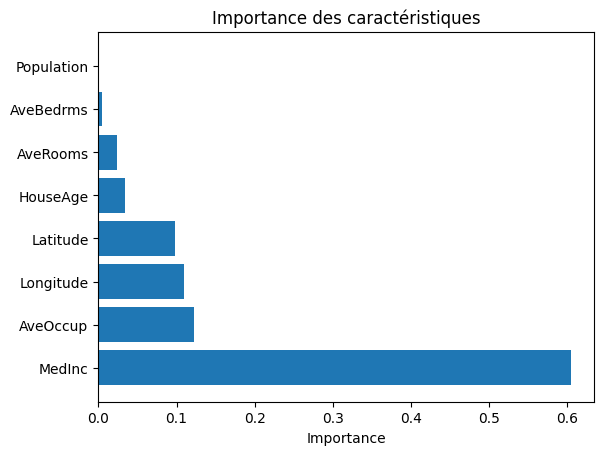

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# importance des caractéristiques
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# afficher les caractéristiques importantes
print("importance des caractéristiques : ")
for i in range(len(data.feature_names)):
    print(f"{data.feature_names[indices[i]]} : {importances[indices[i]]:.2f}")
    
# graphique des importances
plt.barh(range(len(data.feature_names)), importances[indices])
plt.yticks(range(len(data.feature_names)), [data.feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Importance des caractéristiques")
plt.show()

#### Exemple concret, utilité dans le secteur immobilier.

##### Scénarios d'application.
1. Agents immobiliers :
    - Obtenir une estimation rapide des prix pour conseiller des clients.
    - Identifier les quartiers où investir en fonction des caractéristiques qui influencent les prix (proximité des écoles, densité de populaiton, etc).
2. Urbanistes ou mairies :
    - Étudier comment des changements dans un quartier (par exemple, construction d'écoles, réduction de la denstié) peuvent affecter les prix immobiliers.
3. Banques ou investisseurs :
    - Évaluer la valeur des propriétés pour accorder des prêts immobiliers.
    - Simulier des scénarios futurs (hausse de la population ou du coût de la vie) pour prédire leur impact sur le marché immobilier.
    
#### L'intérêt global de cette méthode.
- Précision, fournit des prédictions fiables sur des données complexes.
- Analyse de scénarios, permet de simuler l'effet de différents changements.
- Optimisation des décisions, aide à comprendre les facteurs clés qui influcencent les résultats.

## 2. Apprentissage non supervisé.

Dans l'apprentissage non supervisé, le modèle est formé sur des données non étiquetées. L'objectif est d'explorer la structure des données et d'identifier des motifs ou des regroupements. Utilisé dans des situations où les étiquettes ne sont pas disponibles, il est particulièrement efficace pour :
- Clustering : Regrouper des données similaires. Par exemple, segmenter des clients en fonction de leur comportemet d'achat.
- Réduction de dimensions : Simplifier la structure des données tout en préservant les caractéristiques essentielles. Un exemple célébre est l'algorithme PCA (Analyse en composantes principales).

Les algorithmes populairesd'apprentissage non supervisé incluent :
- K-means
- DBSCAN
- Algorithmes de regroupement hiéracrhique.
- PCA.

### Exemple, clustering avec K-Means pour regrouper des clients selon leur comportement d'achat.

L'apprentissage non supervisé est utlie lorsque vous ne disposez pas de labels (catégories ou cibles dans vos données. Il permet de découvrir des structures cachées ou des groupes dans les données.

**Contexte**
Une entreprise veut regrouper ses clients en fonction de leurs comportements d'achat afin de personnaliser ses offres marketing. Les données contiennent :
- Le montant total dépensé.
- Le nombre de commandes passées.
- La fréquence d'achat.
- La catégorie d'âge.

L'objectif est d'utiliser K-Means Clustering pour :
1. Identifier des groupes (ou segments) de clients avec des comportements similaires.
2. Comprendre les caractéristiques de chaque groupe pour adapter les stratégies commerciales.

#### Étape 1, Importation des bibliothèques.

In [45]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Étape 2, générer ou charger les données.

Les données contiennent les comportements des clients (fictives dans cet exemple).

In [50]:
# Exemple de données client.
data = {
    "Montant dépensé (en €)" : [200, 1500, 250, 3000, 400, 1200, 100, 27000],
    "Nombre de commandes" : [5, 30, 10, 40, 15, 25, 2, 35],
    "Fréquence (jours entre commandes)": [30, 7, 25, 5, 20, 10, 60, 4],
    "Catégorie d'âge": [25, 35, 22, 45, 30, 40, 20, 50]
}

df = pd.DataFrame(data)
print(df)

   Montant dépensé (en €)  Nombre de commandes  \
0                     200                    5   
1                    1500                   30   
2                     250                   10   
3                    3000                   40   
4                     400                   15   
5                    1200                   25   
6                     100                    2   
7                   27000                   35   

   Fréquence (jours entre commandes)  Catégorie d'âge  
0                                 30               25  
1                                  7               35  
2                                 25               22  
3                                  5               45  
4                                 20               30  
5                                 10               40  
6                                 60               20  
7                                  4               50  


#### Étape 3, normalisation des données.

Les caractéristiques sont sur des échelles différentes, donc nous les normalisons pour éviter que certaines dominent.

In [51]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Verifier les données normalisées.
print("Données normalisées : \n", data_scaled)

Données normalisées : 
 [[-0.46243924 -1.14323655  0.56144273 -0.81351187]
 [-0.31238095  0.73092173 -0.74622135  0.15784559]
 [-0.45666776 -0.7684049   0.27716793 -1.10491911]
 [-0.13923677  1.48058504 -0.85993127  1.12920304]
 [-0.43935335 -0.39357324 -0.00710687 -0.32783314]
 [-0.34700978  0.35609007 -0.57565647  0.64352432]
 [-0.47398218 -1.36813555  2.26709153 -1.2991906 ]
 [ 2.63107003  1.10575339 -0.91678623  1.61488177]]


#### Étape 4, application de l'algorithme K-Means.
K-Means regroupe les clients en fonction de leurs similitudes. Nous devons :
    1. Choisir le nombre de clusters (K).
    2. Appliquer l'algorithme pour former les groupes.
    
Déterminer le nombre optimal de clusters (méthode du coude) :

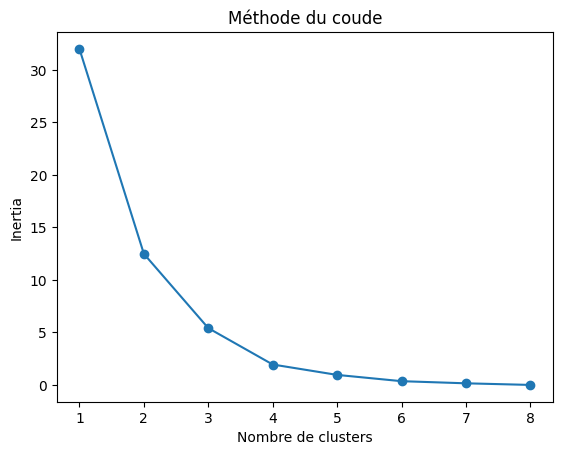

In [55]:
# trouver le nombre optimal de clusters
inertia = []
K = range(1, 9)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
# tracer la méthode du coude
plt.plot(K, inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.show()

Application avec le nombre optimal de clusters, supposons que le coude se trouve `K=3` (3 clusters).

In [54]:
# appliquer k-means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(data_scaled)

# afficher les données avec les clusters
print(df)

   Montant dépensé (en €)  Nombre de commandes  \
0                     200                    5   
1                    1500                   30   
2                     250                   10   
3                    3000                   40   
4                     400                   15   
5                    1200                   25   
6                     100                    2   
7                   27000                   35   

   Fréquence (jours entre commandes)  Catégorie d'âge  Cluster  
0                                 30               25        0  
1                                  7               35        2  
2                                 25               22        0  
3                                  5               45        2  
4                                 20               30        0  
5                                 10               40        2  
6                                 60               20        0  
7                            

#### Étape 5, visualisation des clusters.

Nous pouvons visualiser les groupes sur un graphique 2D (en utilisant seulement deux caractéristiques).

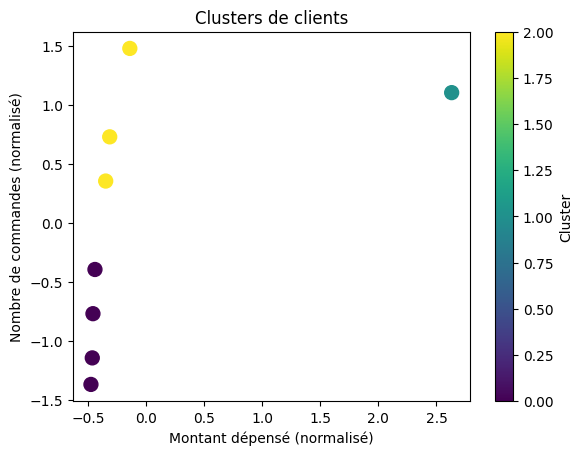

In [56]:
# visualiser les clusters
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=df["Cluster"], cmap="viridis", s=100)
plt.title("Clusters de clients")
plt.xlabel("Montant dépensé (normalisé)")
plt.ylabel("Nombre de commandes (normalisé)")
plt.colorbar(label="Cluster")
plt.show()

##### Résulats et interprétation.
- Les clients sont regroupés en 3 clusters (par exemple):
    - Cluster 0 : Petits acheteurs peu fréquents.
    - Cluster 1 : Acheteurs réguliers avec des dépenses modérés.
    - Cluster 2 : Grands acheteurs très réguliers.
    
##### Applications concrètes.
1. Marketing personnalisé.
    - Envoyer des promotions spécifiques à chaque groupe (ex : gros acheteurs reçoivent des offres premium).
2. Stratégies commerciales.
    - Identifier les clients à fort potentiel (cluster des grands acheteurs) pour investir davantage.
3. Optimisation des ressources.
    - Concentrer les efforts publicitaires sur les groupes les plus rentables.
    
### L'intérêt global de l'apprentissage non supervisé.
- Identifier des groupes naturels dans des données sans labels.
- Découvrir des patterns cachés pour prendre des décisions stratégiques.
- Aider à segmenter des données complexes dans de nombreux domaines :
    - Marketing (segmentation des clients).
    - Santé (regrouper des patients selon leur symptômes).
    - Industrie (identifier des anomalies dans des processus).
    
## 3. Comparaison.

La principale différence entre l'apprentissage supervisé et non supervisé réside dans la disponibilité des étiquettes de données. L'apprentissage supervisé nécessite des données étiquetées pour entraîner le modèle, alors que l'apprentissage non supervisé explore les données non étiquetées pour identifier des structures sous-jacentes.

Dans les sections suivantes, nous explorerons, de manière approfondie certains des algorithmes d'apprentissage supervisé et non supervisé, ainsi que comment les utiliser avec `Scikit-learn` pour résoudre des problèmes du monde réel.